In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications.inception_v3 import InceptionV3
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_data_dir = '/content/drive/MyDrive/Data/Train'
validation_data_dir = '/content/drive/MyDrive/Data/Test'

In [ ]:
IMAGE_SIZE = [224, 224]

In [ ]:
v3 = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in v3.layers:
  layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Data/Train/*')

In [ ]:
folders

['/content/drive/MyDrive/Data/Train/Thu cung',
 '/content/drive/MyDrive/Data/Train/Tai lieu',
 '/content/drive/MyDrive/Data/Train/Toa nha',
 '/content/drive/MyDrive/Data/Train/Selfie',
 '/content/drive/MyDrive/Data/Train/Nguoi',
 '/content/drive/MyDrive/Data/Train/Xe co',
 '/content/drive/MyDrive/Data/Train/Song suoi ho',
 '/content/drive/MyDrive/Data/Train/Giay',
 '/content/drive/MyDrive/Data/Train/Hoa don',
 '/content/drive/MyDrive/Data/Train/Hoa',
 '/content/drive/MyDrive/Data/Train/Dien thoai',
 '/content/drive/MyDrive/Data/Train/Chup man hinh',
 '/content/drive/MyDrive/Data/Train/Bien',
 '/content/drive/MyDrive/Data/Train/Bau troi',
 '/content/drive/MyDrive/Data/Train/Bia sach',
 '/content/drive/MyDrive/Data/Train/Dong ruong',
 '/content/drive/MyDrive/Data/Train/Cay coi',
 '/content/drive/MyDrive/Data/Train/Do an',
 '/content/drive/MyDrive/Data/Train/Duong pho',
 '/content/drive/MyDrive/Data/Train/Doi nui',
 '/content/drive/MyDrive/Data/Train/Ao quan']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(v3.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)


In [ ]:
model = Model(inputs=v3.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_data_dir,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(validation_data_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 11598 images belonging to 21 classes.
Found 1050 images belonging to 21 classes.


In [ ]:
%%time

import os
from keras.callbacks import ModelCheckpoint

checkpoint_path = "save-model/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = ModelCheckpoint(filepath=checkpoint_path,
                                              save_weights_only=True,
                                              save_freq="epoch",
                                              verbose=1)

# thực hiện lưu thủ công tham số của model khi mới tạo
model.save_weights(checkpoint_path.format(epoch=0))

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[cp_callback]
)

Epoch 1/5
363/363 [==============================] - ETA: 0s - loss: 2.2139 - accuracy: 0.8543 
Epoch 00001: saving model to save-model/cp-0001.ckpt
363/363 [==============================] - 5643s 16s/step - loss: 2.2139 - accuracy: 0.8543 - val_loss: 3.4426 - val_accuracy: 0.8305
Epoch 2/5
363/363 [==============================] - ETA: 0s - loss: 1.3751 - accuracy: 0.9183
Epoch 00002: saving model to save-model/cp-0002.ckpt
363/363 [==============================] - 2180s 6s/step - loss: 1.3751 - accuracy: 0.9183 - val_loss: 5.3965 - val_accuracy: 0.7867
Epoch 3/5
363/363 [==============================] - ETA: 0s - loss: 1.1292 - accuracy: 0.9373
Epoch 00003: saving model to save-model/cp-0003.ckpt
363/363 [==============================] - 2192s 6s/step - loss: 1.1292 - accuracy: 0.9373 - val_loss: 5.7470 - val_accuracy: 0.8324
Epoch 4/5
363/363 [==============================] - ETA: 0s - loss: 0.9426 - accuracy: 0.9525
Epoch 00004: saving model to save-model/cp-0004.ckpt
363/363

In [ ]:
!cp -a "/content/save-model/." "/content/drive/MyDrive/model_xception/"

In [ ]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk!")

!cp model.h5 "/content/drive/MyDrive/model_xception/"
!cp model.json "/content/drive/MyDrive/model_xception/"

Saved model to disk!


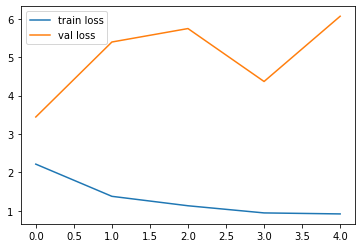

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


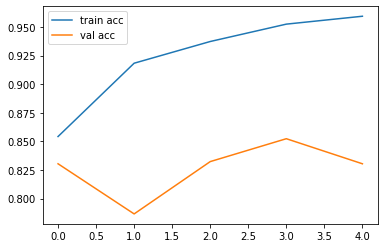

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')